<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT20/blob/master/template-report-lab-X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Lab 7: Optimization and learning **
**Mathias Axelsson**

# **Abstract**

This lab will implement two functions for solving minimization problems. The Gradient descent method and Newton's method, both in $R^N$.

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [116]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2365 Advanced Computation in Fluid Mechanics
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [117]:
# Load neccessary modules.

import time
import numpy as np
import scipy.integrate as integrate
import scipy.optimize as opt
import scipy.linalg as lin
import numpy.random as nprnd

import random as rnd


from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

This lab will look into two methods for solving unconstrained minimization problems. The Gradiend descent method and Newton's method. Both methods takes a function $f$ and an initial position $x_0$ and finds a local minimum. For these minimization methods to work the function $f$ must be convex on the search domain and have a point where $\nabla f(x) = 0$. Otherwise the methods does not converge.

# **Method**

#### Gradient descent method in $R^N$
This method calculates the gradient of the objective function and uses that as a descent direction. There are multiple ways of calculating the step length. For this implementation I assume a step length of 1. If the resulting position is evalated at a higer value than the previous one I halve the step length. This is inefficient and there are better methods. 

In [160]:
def gradient_descent(f, x0, TOL=1e-5, h=1e-6):
    x = x0
    X = x
    Df = lambda x: opt.approx_fprime(x, f, h)
    while np.linalg.norm(Df(x)) > TOL:
        Df = lambda x: opt.approx_fprime(x, f, h)
        a = 1
        while not f(x - a*Df(x)) < f(x):
            if a < TOL:
                break
            a = a/2
        x = x - a*Df(x)
        X = np.vstack((X,x))
    return x, X     

#### Newton's method in $R^N$
Newton's method is based on the Taylor expansion of $f(x)$. It finds each step in $x^{(n)}$ by searching for a critical point $\Delta x = (x^{(n+1)} - x^{(n)})$ in the taylor expansion
$$
f(x^{(n+1)}) \approx f(x^{(n)}) + \nabla f(x^{(n)})(x^{(n+1)} - x^{(n)}) + \frac{1}{2}(x^{(n+1)} - x^{(n)})^T Hf(x^{(n)})(x^{(n+1)} - x^{(n)})
$$
This gives the next step in the iteration as $\nabla f(x^{(n)}) + Hf(x^{(n)})\Delta x = 0$. This equation system is then solved to find $\Delta x$.

In [161]:
def hessian(x, f, h=1e-5):
    
    n = len(x)
    H = np.zeros((n, n))
    Df0 = opt.approx_fprime(x, f, h)
    for i in range(n):
        hi = np.zeros(n)
        hi[i] = h
        Df1 = opt.approx_fprime(x + hi, f, h)
        H[i,:] = (Df1 - Df0)/h
    H = np.around(H, 4)
    return H

def newtons_method(f, x0, TOL=1e-5, h=1e-5):
    x = x0
    X = x
    Df = opt.approx_fprime(x, f, h)
    while np.linalg.norm(Df) > TOL:
        Df = opt.approx_fprime(x, f, h)
        Hf = hessian(x, f)
        dx = np.linalg.inv(Hf)@-Df
        x = x + dx
        X = np.vstack((X,x))
    return x, X

# **Results**

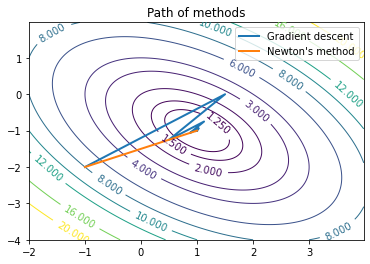

In [181]:
def f(x, A, b, c):
    return 1/2*np.dot(x,A@x) + np.dot(x, b) + c


A = np.array([[2, 1], [1, 2]])

b = np.array([-1, 1])
c = 2

x = np.array([-1, -2])

f1 = lambda x: f(x, A, b, c)

# Solution
sol = np.array([1, -1])

assert np.linalg.norm(sol - gradient_descent(f1, x)[0]) < 1e-5
assert np.linalg.norm(sol - newtons_method(f1, x)[0]) < 1e-5

xg, Xg = gradient_descent(f1, x)
xn, Xn = newtons_method(f1, x)

delta = 0.025
x = np.arange(-2.0, 4.0, delta)
y = np.arange(-4.0, 2.0, delta)
X, Y = np.meshgrid(x, y)

Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        Z[i,j] = f1(np.array([X[i,j], Y[i,j]]))

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, [1.25, 1.5, 2, 3, 4, 6, 8, 10, 12, 16, 20], linewidths=1)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Path of methods')
ax.plot(Xg[:,0], Xg[:,1], label="Gradient descent", linewidth=2)
ax.plot(Xn[:,0], Xn[:,1], label="Newton's method", linewidth=2)

ax.legend()


# **Discussion**

The functions work as intended. It is obvious that a better linesearch method could be used for the gradient descent method. However, I had problems implementing most of them. Out of the two methods, Newton's method was easier to implement for me. In this case Newton's method is obviously better as it reaches the minimum using fewer iterations. 